<a href="https://colab.research.google.com/github/jasog01/cursomlean/blob/main/GUIA_1_Actividad_2_Reg_LINEAL_Y_LOGISTICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 2. Calidad del vino

**Integrantes del Grupo:**
- Jose Sogamoso
- Andres Marin
- Blexy Granados

# **2a. Regresión Lineal para determinar la calidad del vino**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
url ='https://raw.githubusercontent.com/ANDIsign/especializacion/main/winequality-red.csv'
df = pd.read_csv(url,delimiter=';')

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

# VARIABLES EN EL CONJUNTO DE DE DATOS

* **Fixed acidity (Acidez fija)**: Variable numérica continua, medida en g/L.***Tipo de variable* (VARIABLE PREDICTORA)**
* **Volatile acidity (Acidez volátil)**: Variable numérica continua, medida en g/L. ***Tipo de variable* (VARIABLE PREDICTORA)**
* **Citric acid (Ácido cítrico):** Variable numérica continua, medida en g/L. ***Tipo de variable* (VARIABLE PREDICTORA)**
* **Residual sugar (Azúcar residual):** Variable numérica continua, medida en g/L. ***Tipo de variable* (VARIABLE PREDICTORA)**
* **Chlorides (Cloruros):** Variable numérica continua, medida en g/L. ***Tipo de variable* (VARIABLE PREDICTORA)**
* **Free sulfur dioxide (Dióxido de azufre libre)**: Variable numérica continua,  medida en mg/L. ***Tipo de variable* (VARIABLE PREDICTORA)**
* **Total sulfur dioxide (Dióxido de azufre total):** Variable numérica continua,  medida en mg/L. ***Tipo de variable* (VARIABLE PREDICTORA)**
* **Density (Densidad):** Variable numérica continua, medida en g/cm^3. ***Tipo de variable* (VARIABLE PREDICTORA)**
* **pH:** Variable numérica continua, medida en una escala de 0 a 14. ***Tipo de variable* (VARIABLE PREDICTORA)**
* **Sulphates (Sulfatos):** Variable numérica continua, medida en g/L. ***Tipo de variable* (VARIABLE PREDICTORA)**
* **Alcohol (Alcohol):** Variable numérica continua, medida en % vol. ***Tipo de variable* (VARIABLE PREDICTORA)**
* **Quality (Calidad):** Variable númerica de enteros, medida en una escala de 0 a 10. ***Tipo de variable* (VARIABLE OBJETIVO)**
* **Quality Label (Etiqueta de Calidad):** Variable númerica que indica si el vino ha sido clasificado como "bueno" o "malo" por el modelo. Los vinos clasificados como "buenos" tienen una etiqueta de 1, mientras que los clasificados como "malos" tienen una etiqueta de 0. ***Tipo de variable (VARIABLE OBJETIVO)***

CONVERTIR QUALITY

In [ ]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)


In [ ]:
df['quality_label'].value_counts()

quality_label
1    855
0    744
Name: count, dtype: int64

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
categorical_quality       int64
quality_label             int64
dtype: object

TRATAMIENTO DE NULOS

In [ ]:
# Convertir la columna 'categorical_quality' en variables dummy
df = pd.get_dummies(df, columns=['quality_label'], drop_first=True)

# Imputar valores nulos con la mediana de cada columna
df.fillna(df.median(), inplace=True)

In [ ]:
# Verificar si hay valores nulos después de la imputación
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
dtype: int64


# ENTRENAMIENTO DE MODELO REGRESIÓN LINEAL

In [ ]:
# Definir una función para clasificar la calidad del vino
def clasificar_calidad(calidad):
    if calidad >= 6:
        return 'bueno'
    else:
        return 'no bueno'

# Aplicar la función a la columna 'quality' para crear una nueva columna 'quality_label'
df['quality_label'] = df['quality'].apply(clasificar_calidad)

In [ ]:
# Convertir la columna 'quality_label' a valores numéricos
df['quality_label'] = df['quality_label'].map({'bueno': 1, 'no bueno': 0})


In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


# MODELO

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Definir características (features) y etiquetas (labels)
X = df.drop(columns=['quality', 'quality_label'], axis=1)  # Eliminar 'quality' del conjunto de características
y = df['quality_label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000)  # Ajustar el parámetro max_iter según sea necesario
model.fit(X_train_scaled, y_train)

# Evaluar el modelo
accuracy = model.score(X_test_scaled, y_test)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.740625


# PRUEBAS

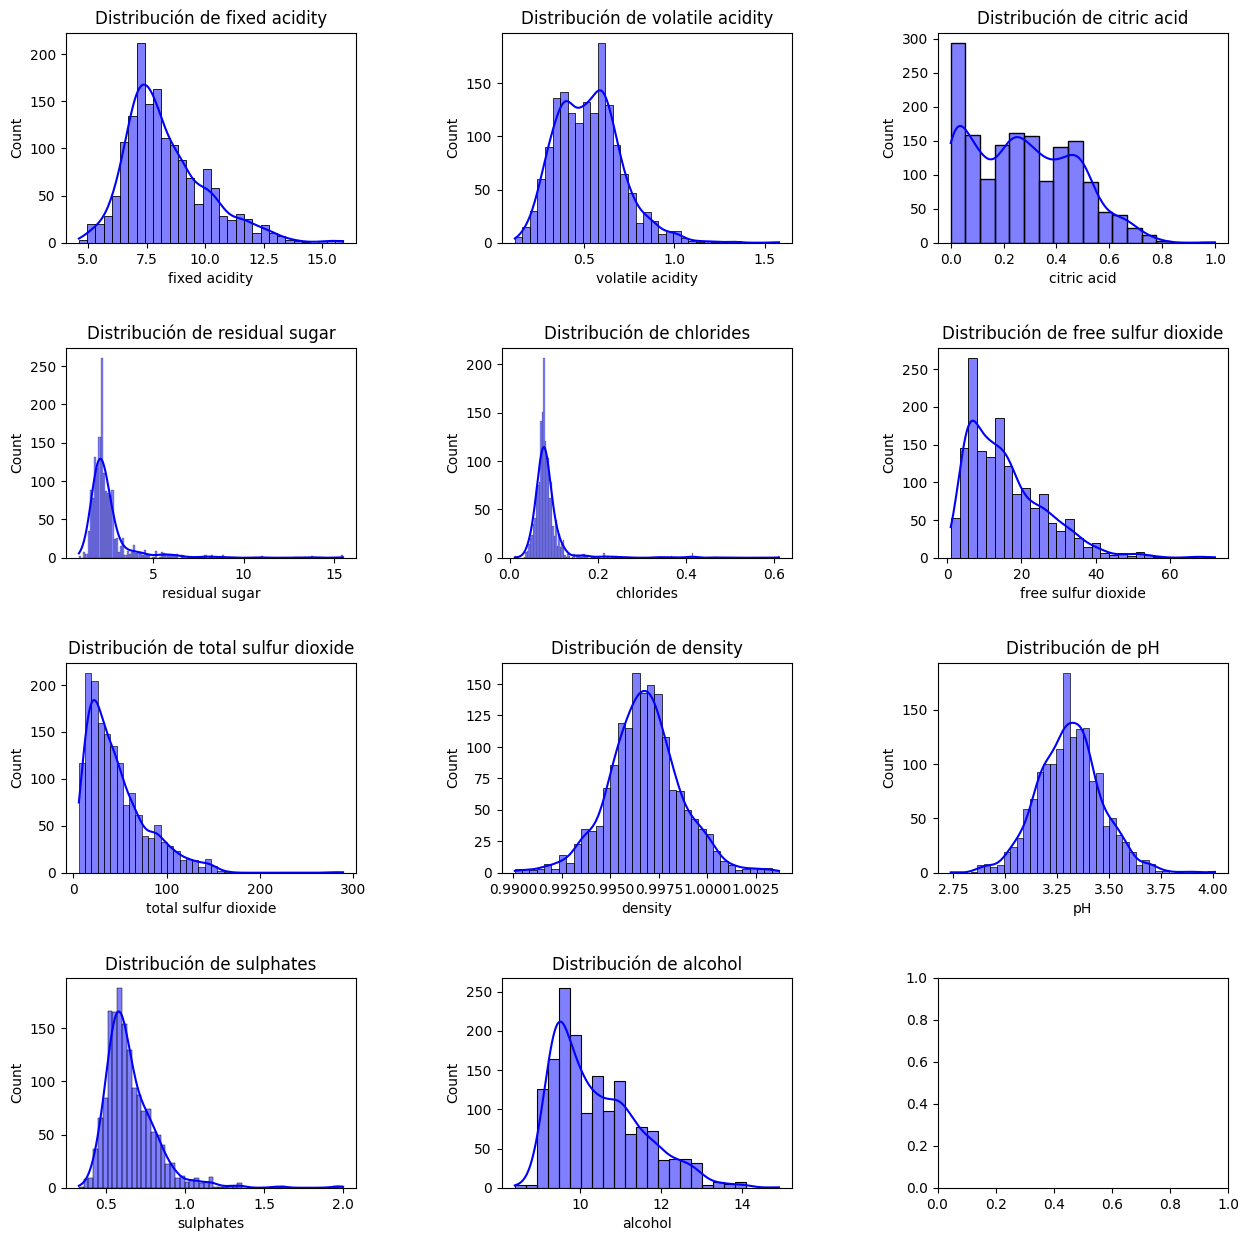

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las características para visualizar
features_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid',
                    'residual sugar', 'chlorides', 'free sulfur dioxide',
                    'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Crear subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Iterar sobre cada característica y crear gráficos
for i, feature in enumerate(features_to_plot):
    row = i // 3
    col = i % 3
    sns.histplot(df[feature], ax=axs[row, col], kde=True, color='blue', edgecolor='black')
    axs[row, col].set_title(f'Distribución de {feature}')
    axs[row, col].set_xlabel(feature)

plt.show()


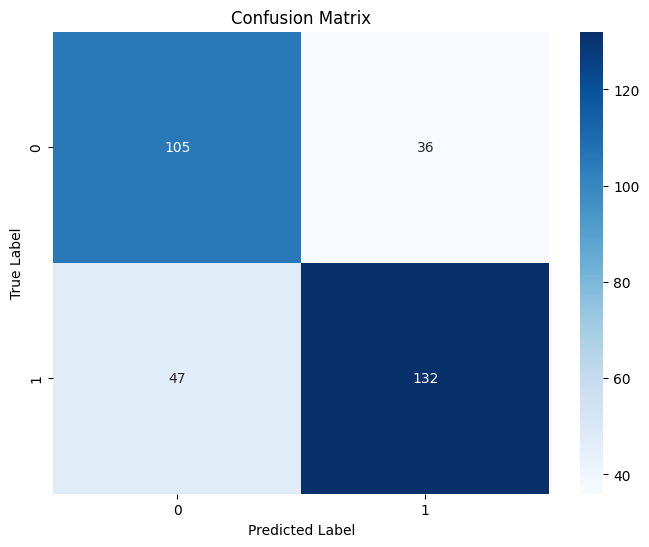

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener las etiquetas verdaderas y las predicciones del modelo
y_true = y_test
y_pred = model.predict(X_test_scaled)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Crear el gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# GRÁFICAS

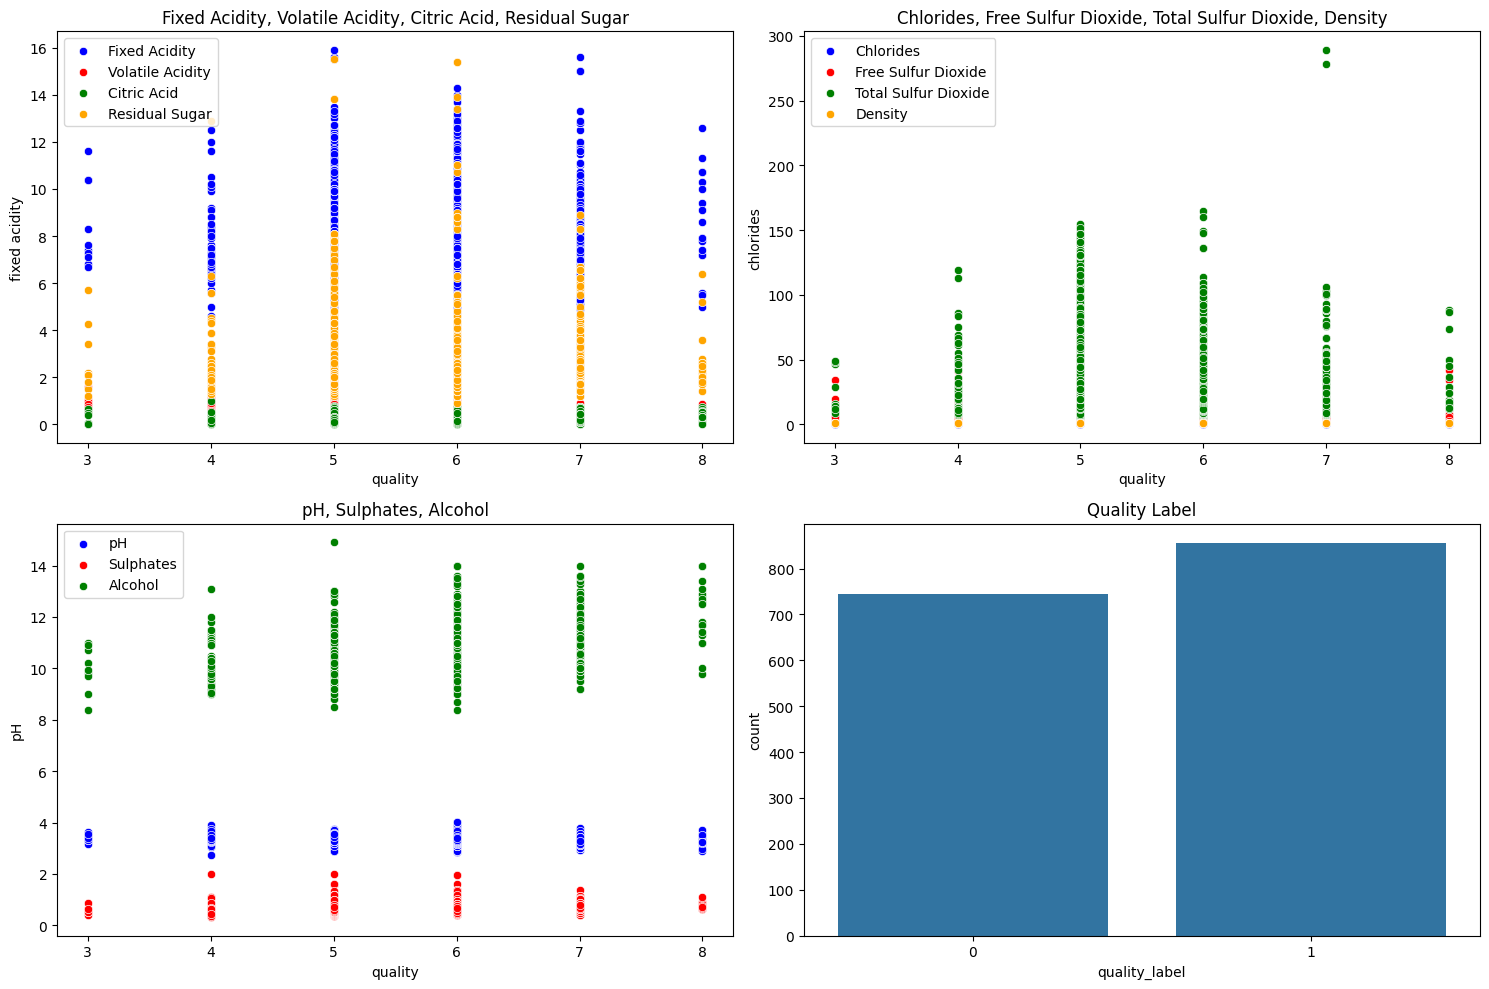

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir las variables en grupos
group1 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
group2 = ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']
group3 = ['pH', 'sulphates', 'alcohol']
group4 = ['quality_label']

# Crear subplots para las cuatro gráficas
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar
sns.scatterplot(data=df, x='quality', y='fixed acidity', ax=axs[0, 0], color='blue', label='Fixed Acidity')
sns.scatterplot(data=df, x='quality', y='volatile acidity', ax=axs[0, 0], color='red', label='Volatile Acidity')
sns.scatterplot(data=df, x='quality', y='citric acid', ax=axs[0, 0], color='green', label='Citric Acid')
sns.scatterplot(data=df, x='quality', y='residual sugar', ax=axs[0, 0], color='orange', label='Residual Sugar')
axs[0, 0].set_title('Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar')

# Gráfico 2: Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Density
sns.scatterplot(data=df, x='quality', y='chlorides', ax=axs[0, 1], color='blue', label='Chlorides')
sns.scatterplot(data=df, x='quality', y='free sulfur dioxide', ax=axs[0, 1], color='red', label='Free Sulfur Dioxide')
sns.scatterplot(data=df, x='quality', y='total sulfur dioxide', ax=axs[0, 1], color='green', label='Total Sulfur Dioxide')
sns.scatterplot(data=df, x='quality', y='density', ax=axs[0, 1], color='orange', label='Density')
axs[0, 1].set_title('Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Density')

# Gráfico 3: pH, Sulphates, Alcohol
sns.scatterplot(data=df, x='quality', y='pH', ax=axs[1, 0], color='blue', label='pH')
sns.scatterplot(data=df, x='quality', y='sulphates', ax=axs[1, 0], color='red', label='Sulphates')
sns.scatterplot(data=df, x='quality', y='alcohol', ax=axs[1, 0], color='green', label='Alcohol')
axs[1, 0].set_title('pH, Sulphates, Alcohol')

# Gráfico 4: Quality Label
sns.countplot(x='quality_label', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Quality Label')

# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show()


# **2b. Regresión Logística para determinar la calidad del vino**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
url ='https://raw.githubusercontent.com/Fire2025/Visualizacion_CienciadeDatos/main/winequality-red.csv'
df = pd.read_csv(url, delimiter = ';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Estadísticas descriptivas para las variables numéricas
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Variable categórica basada en la calidad del vino
df['categorical_quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

Si quality es mayor o igual a 6 entonces el vino es bueno, de lo contrario la calidad es regular.

*   categorical_quality = 1 -> Bueno
*   categorical_quality = 0 -> Regular



In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categorical_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


Se particiona la base 80-20 para determinar base de entrenamiento y testeo para la regresión logística. Posteriormente, entrene la regresión logística con la base de entrenamiento.

In [ ]:
# Dividimos los datos en entrenamiento y prueba
X = df.drop(['quality', 'categorical_quality'], axis=1)
y = df['categorical_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Entrenamiento del modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Evaluación del modelo
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.740625
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.72       141
           1       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320

Confusion Matrix:
 [[107  34]
 [ 49 130]]


**Conclusiones:**

La precisión del modelo es de aproximadamente 74.06%.

La clase 0 (calidad regular) tiene una precisión del 69% y un recall del 76%, con un puntaje F1 de 72%.
La clase 1 (buena calidad) tiene una precisión del 79%, un recall del 73%, y un puntaje F1 de 76%.

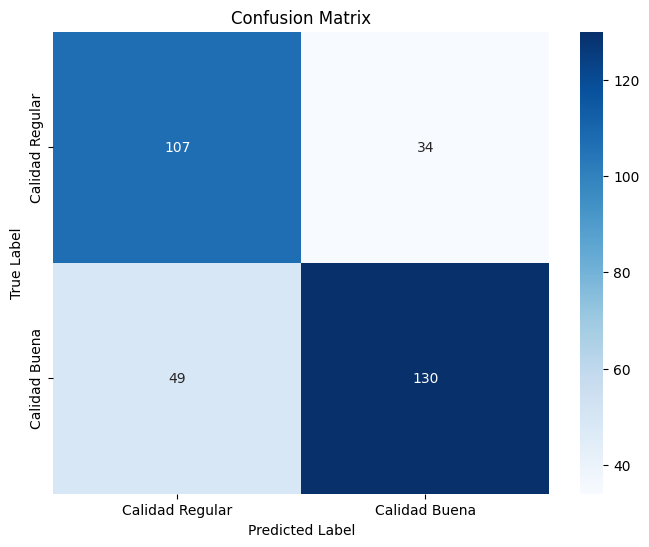

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Calidad Regular', 'Calidad Buena'], yticklabels=['Calidad Regular', 'Calidad Buena'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

La matriz de confusión:

107 vinos de calidad regular fueron correctamente clasificados, mientras que 34 fueron incorrectamente clasificados como de buena calidad.
130 vinos de buena calidad fueron correctamente clasificados, mientras que 49 fueron incorrectamente clasificados como de calidad regular.

### **Aunque el modelo es bueno prediciendo la calidad del vino, se puede mejorar en términos de reducir el número de falsos positivos y falsos negativos.**

In [ ]:
# Aplicando regularización L2 con un C más bajo para mayor regularización
model = LogisticRegression(max_iter=1000, C= 0.5, penalty='l2')
model.fit(X_train, y_train)

# Reevaluación del modelo con los nuevos parámetros
y_pred = model.predict(X_test)
new_conf_matrix = confusion_matrix(y_test, y_pred)
print('New Accuracy:', accuracy_score(y_test, y_pred))


New Accuracy: 0.740625


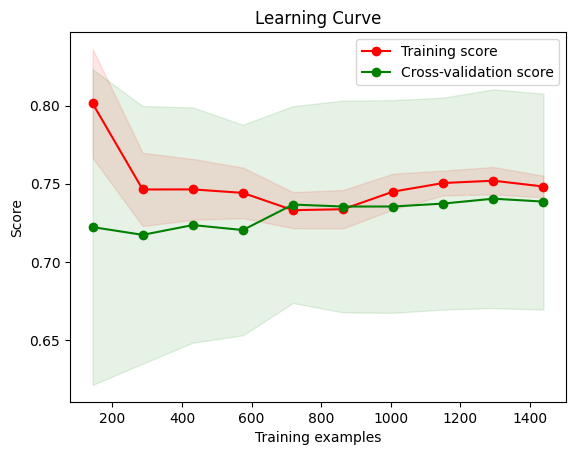

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model = LogisticRegression(max_iter=1000)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' es bueno para conjuntos pequeños y maneja L1
}

# Configurar la búsqueda
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
print("Mejor puntuación: ", grid_search.best_score_)
print("Mejores parámetros: ", grid_search.best_params_)

# Evaluar en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Precisión en el conjunto de prueba: ", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor puntuación:  0.748296568627451
Mejores parámetros:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Precisión en el conjunto de prueba:  0.74375


### El mejor modelo encontrado por GridSearchCV para hacer predicciones en el conjunto de prueba y calcular la precisión. Se evidenica que el modelo proporciona una precisión aceptable en el conjunto de prueba, lo que indica un buen equilibrio entre aprendizaje y generalización.

In [ ]:
feature_importance = pd.Series(index=X_train.columns, data=np.abs(best_model.coef_[0]))
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)


density                 3.804301
chlorides               3.788135
volatile acidity        2.993823
sulphates               2.629688
citric acid             1.054114
alcohol                 0.912338
pH                      0.475988
fixed acidity           0.096238
free sulfur dioxide     0.030356
total sulfur dioxide    0.018464
residual sugar          0.006086
dtype: float64


## **La conclusión al utilizar la regresión logística para predecir la calidad del vino:**
  1. Las curvas de aprendizaje indicaron que añadir más datos no mejoraría sustancialmente el rendimiento del modelo, lo que sugiere que se debe enfocar el análisis del modelo en otras métricas.  
  2. Mediante la optimización de los hiperparámetros del modelo mediante GridSearchCV, el modelo ajustado alcanzó una precisión satisfactoria en el conjunto de prueba.
  3. Con el análisis de las características, se evidenció que la densidad y los cloruros son determinantes significativos en la predicción de la calidad del vino.


# **CONCLUSIÓN DE LA APLICACION DE LOS MODELOS DE REGRESIÓN LINEAL Y REGRESIÓN LOGÍSTICA**

# **Los dos modelos muestran un rendimiento estadístico adecuado:**

**Regresión lineal:**
  1. Permitió evaluar la relación directa y continua entre los predictores y la calidad del vino, identificando variables como el alcohol y la acidez volátil como influencias significativas.
  2. Ofreció insights sobre la magnitud de impacto de cada característica.
  
**Regresión logística:**
  1. Ofrece una perspectiva sobre la clasificación binaria de la calidad, destacando la densidad y los cloruros como determinantes clave.
  2. Proporciona una mejor herramienta para clasificación directa.

Utilizar una combinación de enfoques analíticos como las regresiones lineales y logísticas sirven para abordar diferentes necesidades en la industria vinícola, desde el control de calidad hasta la optimización de procesos.